<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li></ul></div>

# Восстановление золота из руды

## Подготовка данных

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.dummy import DummyRegressor

In [2]:
train = pd.read_csv('/datasets/gold_industry_train.csv')
test = pd.read_csv('/datasets/gold_industry_test.csv')
full = pd.read_csv('/datasets/gold_industry_full.csv')

In [3]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


In [5]:
train.dropna(subset = ['rougher.output.recovery'], inplace = True)
c = train['rougher.output.concentrate_au']
f = train['rougher.input.feed_au']
t = train['rougher.output.tail_au']

In [6]:
calc = ((c * (f - t)) / (f * (c - t))) * 100
old_rec = train['rougher.output.recovery']

In [7]:
print('MAE:', mean_absolute_error(old_rec, calc))

MAE: 9.83758577644259e-15


MAE - очень маленькое, следовательно различий в данных очень мало, данные посчитаны верно

In [8]:
m = train.columns.drop(test.columns)
train[m].head()

,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,42050.861809,3498.370979,3489.981857,2.858998,20.050975,11.615865,7.278807,28.067063,86.843261,1.184827,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,42018.101184,3495.348910,3502.359819,2.945989,19.737170,11.695753,7.216833,27.454037,86.842308,1.162562,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,42029.447991,3498.578313,3499.162912,3.002340,19.320810,11.915047,7.175616,27.341277,87.226430,1.079755,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,42125.354245,3494.800771,3506.679315,3.169615,19.216101,12.411054,7.240205,27.041023,86.688794,1.012642,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


Эти столбцы это целевые признаки, это концентрация различных веществ на выходе после отчистки, а также доля веществ в отвальных хвостах. Эти признаки нужны кроме 'final.output.recovery', 'rougher.output.recovery', для расчета эффективности обогащения это офлайн метрика и они нам больше не нужны, так как мы имитируем модель в реальных условиях протекания технологического процесса.

In [9]:
c = m.drop(['final.output.recovery', 'rougher.output.recovery'])
k = train.columns.drop(c)
train = train[k]


In [10]:
test.head(1)

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.93949,12.990306,-500.080993,19.990336,-499.191575


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14579 entries, 0 to 14578
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        14579 non-null  object 
 1   rougher.input.feed_au                       14579 non-null  float64
 2   rougher.input.feed_ag                       14579 non-null  float64
 3   rougher.input.feed_pb                       14507 non-null  float64
 4   rougher.input.feed_sol                      14502 non-null  float64
 5   rougher.input.feed_rate                     14572 non-null  float64
 6   rougher.input.feed_size                     14478 non-null  float64
 7   rougher.input.floatbank10_sulfate           14548 non-null  float64
 8   rougher.input.floatbank10_xanthate          14572 non-null  float64
 9   rougher.state.floatbank10_a_air             14579 non-null  float64
 10  rougher.st

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

## Анализ данных

In [13]:
au_data = (full[[
    'rougher.input.feed_au', 
    'rougher.output.concentrate_au', 
    'primary_cleaner.output.concentrate_au', 
    'final.output.concentrate_au']])
ag_data = (full[[
    'rougher.input.feed_ag', 
    'rougher.output.concentrate_ag', 
    'primary_cleaner.output.concentrate_ag', 
    'final.output.concentrate_ag']])
pb_data = (full[[
    'rougher.input.feed_pb', 
    'rougher.output.concentrate_pb', 
    'primary_cleaner.output.concentrate_pb', 
    'final.output.concentrate_pb']])

In [14]:
def hist (data, title):
    fig, ax = plt.subplots()
    ax.set_ylabel('Кол-во наблюдений')
    ax.set_xlabel('Концентрация металла')
    ax.set_title(title)
    for col in data:
        data[col].hist(alpha=.3) 
        ax.legend(['Исходное сырье','Флотация','Первичная очистка', 'Вторичная очистка'])

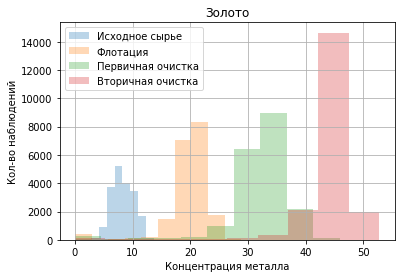

In [15]:
hist(au_data, 'Золото')

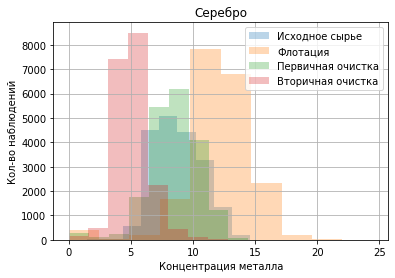

In [16]:
hist(ag_data, 'Серебро')

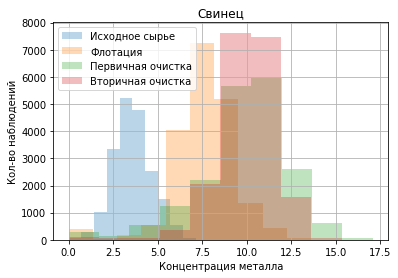

In [17]:
hist(pb_data, 'Свинец')

Видно, что контрация металла по разному себя ведет. В золоте концетрация увеличивается с каждым этапом. У серебра самая низкая коцентрация при вторичной очистке и самая высокая при флотации. У свинца же концетрация растет при кадом этапе, но при очстках она идентична.

In [18]:
concentrate_data = full[['date','rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',  'rougher.input.feed_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au']]
concentrate_data['conc_sum_rougher_input'] = concentrate_data['rougher.input.feed_ag'] + concentrate_data['rougher.input.feed_pb'] + concentrate_data['rougher.input.feed_sol'] + concentrate_data['rougher.input.feed_au'] 
concentrate_data['conc_sum_rougher_output'] = concentrate_data['rougher.output.concentrate_ag'] + concentrate_data['rougher.output.concentrate_pb'] + concentrate_data['rougher.output.concentrate_sol']
concentrate_data['conc_sum_primary'] = concentrate_data['primary_cleaner.output.concentrate_ag'] + concentrate_data['primary_cleaner.output.concentrate_pb'] + concentrate_data['primary_cleaner.output.concentrate_sol'] + concentrate_data['primary_cleaner.output.concentrate_au']
concentrate_data['conc_sum_final'] = concentrate_data['final.output.concentrate_ag'] + concentrate_data['final.output.concentrate_pb'] + concentrate_data['final.output.concentrate_sol'] + concentrate_data['final.output.concentrate_au']

/tmp/ipykernel_48/4053942796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concentrate_data['conc_sum_rougher_input'] = concentrate_data['rougher.input.feed_ag'] + concentrate_data['rougher.input.feed_pb'] + concentrate_data['rougher.input.feed_sol'] + concentrate_data['rougher.input.feed_au']
/tmp/ipykernel_48/4053942796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concentrate_data['conc_sum_rougher_output'] = concentrate_data['rougher.output.concentrate_ag'] + concentrate_data['rougher.output

In [19]:
concentrate_data = concentrate_data[
    (concentrate_data['conc_sum_rougher_input'] >  1) & 
    (concentrate_data['conc_sum_rougher_output'] > 1) & 
    (concentrate_data['conc_sum_primary'] > 1) & 
    (concentrate_data['conc_sum_final'] > 1)
]

concentrate_data.shape

(18082, 20)

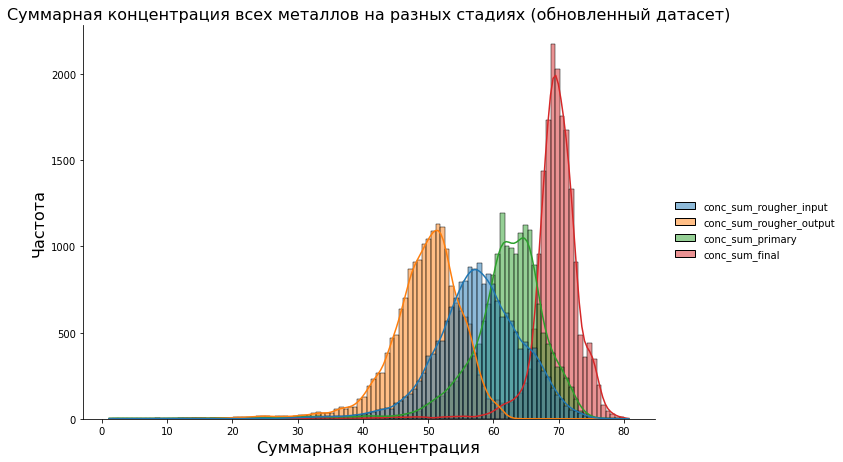

In [20]:
sns.displot(concentrate_data[['conc_sum_rougher_input', 'conc_sum_rougher_output', 
                       'conc_sum_primary', 'conc_sum_final']], 
            legend=True, 
            kde=True, 
            height=6, 
            aspect=1.5)
plt.title('Суммарная концентрация всех металлов на разных стадиях (обновленный датасет)', fontsize=16);
plt.xlabel('Суммарная концентрация', fontsize=16);
plt.ylabel('Частота', fontsize=16);

In [21]:
train = train[train['date'].isin(concentrate_data['date'])]
test_clean = test[test['date'].isin(concentrate_data['date'])]

train.dropna(inplace=True)
test.dropna(inplace=True)  

print('Обучающая выборка', train.shape)
print('Тестовая выборка', test.shape)

Обучающая выборка (12529, 55)
Тестовая выборка (4537, 53)


In [22]:
train = train.set_index('date')
test = test.set_index('date')

In [23]:
l = full[['date', 'final.output.recovery', 'rougher.output.recovery']].copy()
test = test.join(l.set_index('date'))

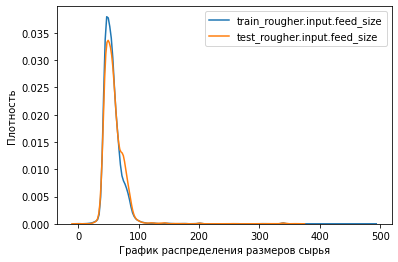

In [24]:
sns.kdeplot(train['rougher.input.feed_size']) 
sns.kdeplot(test['rougher.input.feed_size'])
plt.xlabel('Размеры гранул исходного сырья')
plt.ylabel('Плотность')
plt.xlabel('График распределения размеров сырья')
plt.legend(['train_rougher.input.feed_size', 'test_rougher.input.feed_size'])
plt.show()

Распределения размеров гранул исходного сырья на обучающей и тестовой выборках незначительные, они не должны повлиять на работу модели

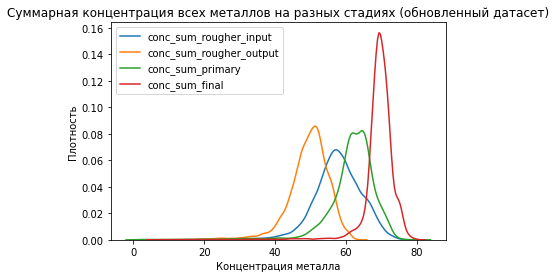

In [25]:
sns.kdeplot(concentrate_data['conc_sum_rougher_input']) 
sns.kdeplot(concentrate_data['conc_sum_rougher_output'])
sns.kdeplot(concentrate_data['conc_sum_primary'])
sns.kdeplot(concentrate_data['conc_sum_final'])
plt.xlabel('Концентрация металла')
plt.ylabel('Плотность')
plt.title('Суммарная концентрация всех металлов на разных стадиях (обновленный датасет)');
plt.legend(['conc_sum_rougher_input', 'conc_sum_rougher_output', 'conc_sum_primary', 'conc_sum_final'])
plt.show()

Можем заметить, что концентрация самая высокая при фианльном варианте, а самая низкая при первой очистке. Что интересно концентрация растет при каждой стадии, но при этом он падает после первой стадии, и потом растет.

## Модель

In [343]:
print(test.shape)
print(train.shape)
test.dropna(inplace=True)
train.dropna(inplace=True)
print(test.shape)
train.shape

(4537, 54)
(12529, 54)
(4537, 54)


(12529, 54)

In [344]:
def smape (target, predictions):
    return 100/len(target) * np.sum(2 * np.abs(predictions - target) / (np.abs(target) + np.abs(predictions)))
def final_smape (rougher, final):
    return 0.25 * rougher + 0.75 * final

In [345]:
target_rougher = train['rougher.output.recovery']
target_final = train['final.output.recovery']

features_train = train.drop(['final.output.recovery', 'rougher.output.recovery'], axis='columns')

In [346]:
scaler = StandardScaler()
scaler.fit(features_train)
features_train = scaler.transform(features_train)

In [349]:
results_cross_val = []

for model in models: 
    
    scorer = make_scorer(smape, greater_is_better=False) 
    
    cross_val_score_rougher = cross_val_score(model, 
                                              features_train, 
                                              target_rougher, 
                                              cv=3, scoring=scorer).mean()
    cross_val_score_final = cross_val_score(model, 
                                            features_train, 
                                            target_final, 
                                            cv=3, scoring=scorer).mean()

    results_cross_val.append({'model name': model.__class__.__name__, 
                              'cross_val_score_rougher': -cross_val_score_rougher, 
                              'cross_val_score_final': -cross_val_score_final}) 
              
pd.DataFrame(results_cross_val)

,model name,cross_val_score_rougher,cross_val_score_final
0,DecisionTreeRegressor,7.589251,14.229362
1,RandomForestRegressor,6.591593,9.412585
2,LinearRegression,7.587226,10.065586


Модель линейной регрессии и случайного леса показали себя сравнимо одинаково, разберем их детеальнее.

In [350]:
results = []

for depth in range(1,5):
    
    for estimator in range(10, 21, 5):
        
        model = RandomForestRegressor(random_state=12345, 
                                       n_estimators=estimator, 
                                       max_depth=depth)
        
        scorer = make_scorer(smape, greater_is_better=False) 
    
        cross_val_score_rougher = cross_val_score(model, features_train, target_rougher, cv=3, scoring=scorer).mean()
        cross_val_score_final = cross_val_score(model, features_train, target_final, cv=3, scoring=scorer).mean()

        smape_final_result = final_smape(cross_val_score_rougher, cross_val_score_final)

        results.append({'model name': model.__class__.__name__, 
                        'Hyperparameters': {'random_state': 12345, 
                                            'n_estimators': estimator, 
                                            'max_depth':depth}, 
                        'smape_final_result': -smape_final_result})

pd.DataFrame(results).style.highlight_max(color = 'lightgreen', axis = 0)

,model name,Hyperparameters,smape_final_result
0,RandomForestRegressor,"{'random_state': 12345, 'n_estimators': 10, 'max_depth': 1}",8.246338
1,RandomForestRegressor,"{'random_state': 12345, 'n_estimators': 15, 'max_depth': 1}",8.245482
2,RandomForestRegressor,"{'random_state': 12345, 'n_estimators': 20, 'max_depth': 1}",8.241353
3,RandomForestRegressor,"{'random_state': 12345, 'n_estimators': 10, 'max_depth': 2}",8.157116
4,RandomForestRegressor,"{'random_state': 12345, 'n_estimators': 15, 'max_depth': 2}",8.215272
5,RandomForestRegressor,"{'random_state': 12345, 'n_estimators': 20, 'max_depth': 2}",8.209260
6,RandomForestRegressor,"{'random_state': 12345, 'n_estimators': 10, 'max_depth': 3}",8.378215
7,RandomForestRegressor,"{'random_state': 12345, 'n_estimators': 15, 'max_depth': 3}",8.455765
8,RandomForestRegressor,"{'random_state': 12345, 'n_estimators': 20, 'max_depth': 3}",8.394943
9,RandomForestRegressor,"{'random_state': 12345, 'n_estimators': 10, 'max_depth': 4}",8.381182


In [351]:
model = LinearRegression()
        
scorer = make_scorer(smape, greater_is_better=False) 
    
cross_val_score_rougher = cross_val_score(model, features_train, target_rougher, cv=3, scoring=scorer).mean()
cross_val_score_final = cross_val_score(model, features_train, target_final, cv=3, scoring=scorer).mean()

smape_final_result = final_smape(cross_val_score_rougher, cross_val_score_final)

print('smape:', -smape_final_result)

smape: 9.445996402996705


Модель случайного леса с перебором гиперпараметров показала себя лучше, ее и выберем.

In [353]:
target_rougher_test = test['rougher.output.recovery']
target_final_test = test['final.output.recovery']

features_test = test.drop(['final.output.recovery', 'rougher.output.recovery'], axis='columns')

In [354]:
features_test = scaler.transform(features_test)

In [355]:
model_final = RandomForestRegressor(random_state=12345, 
                                       n_estimators=20, 
                                       max_depth=2)

model_final.fit(features_train, target_rougher)
predictions_r = model_final.predict(features_test)

model_final.fit(features_train, target_final)
predictions_f = model_final.predict(features_test)

In [356]:
smape_r = smape(target_rougher_test, predictions_r)
smape_f = smape(target_final_test, predictions_f)

print('Итоговое sMAPE:', final_smape(smape_r, smape_f))

Итоговое sMAPE: 7.362492075841759


Модель показала результат 7.3

In [357]:
dummy_regr = DummyRegressor(strategy='mean')

dummy_regr.fit(features_train, target_rougher)
predictions_r_dummy = dummy_regr.predict(features_test)

dummy_regr.fit(features_train, target_final)
predictions_f_dummy = dummy_regr.predict(features_test)

In [358]:
smape_r_dummy = smape(target_rougher_test, predictions_r_dummy)
smape_f_dummy = smape(target_final_test, predictions_f_dummy)

print('Итоговое sMAPE', final_smape(smape_r_dummy, smape_f_dummy))

Итоговое sMAPE 8.291323762595681


Обученная модель работает чуть лучше чем константная модель. Значит модель адекватна

**Вывод: проект прошел в 3 этапа
1 этап подготовка данных: загрузили данные, убедилис, что эффективность обогащения рассчитана правильно. Провели предобработку данных
2 этап: посмотрели, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах. Убедились что, распределения размеров гранул исходного сырья на обучающей и тестовой выборках незначительны. Исследовали суммарную концентрацию металлов на разных стадиях, поняли что есть нулевые значения.
3 этап: Написали функцию для вычисления итоговой sMAPE. Обучили разные модели и оценили их качество кросс-валидацией. Выбрали лучшую модель, а именно линейная регрессия и проверели её на тестовой выборке. По нашей метрике smapeполучили результат 7.3. Проверили модель на адекватность, она показала себя лучше контакстной модели, следовательно модель адекватна.**


<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: общий вывод по проекту v.2.

Джумахон, продолжаем работу над проектом - актуальные замечания отмечены комментариями с меткой `v.2`.
    
Жду тебя снова:)

<div style="border:solid Chocolate 2px; padding: 40px">

# Комментарий ревьюера: общий вывод по проекту v.3.

Джумахон, все замечания учтены - проект принят!
    
Спасибо за хорошую работу над проектом, желаю успехов в дальнейшем обучении:)